# ANN Metrics
<br>
Calculate and visualise ANN result metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
predictions = pd.read_csv("ANN_features/ann_test_results_final.csv",index_col=0)
print(len(predictions))
predictions.head()

30000


,ann_test_result
0,0
1,2
2,0
3,0
4,5


In [3]:
test = pd.read_csv("ANN_features/test_200.csv",index_col=0)
y_test_lang = test['lang']
y_test = y_test_lang.map({"eng": 0, "deu": 1, "spa": 2, "fra": 3, "por": 4, "ita": 5})

print(len(y_test))
y_test.head()

30000


0    0
1    2
2    0
3    0
4    5
Name: lang, dtype: int64

In [4]:
accuracy_score(y_test,predictions)

0.9813

In [5]:
print(confusion_matrix(y_test,predictions))

[[5034   12   11   18    6   13]
 [   6 5056    1    6    0    2]
 [   6    5 4814   30   98   51]
 [   9    6   13 4888    9   19]
 [   3    4  120    6 4798   29]
 [   2    4   37   16   19 4849]]


In [14]:
print(classification_report(y_test,predictions,digits=4)) 

              precision    recall  f1-score   support

           0     0.9949    0.9882    0.9915      5094
           1     0.9939    0.9970    0.9955      5071
           2     0.9636    0.9620    0.9628      5004
           3     0.9847    0.9887    0.9867      4944
           4     0.9732    0.9673    0.9703      4960
           5     0.9770    0.9842    0.9806      4927

   micro avg     0.9813    0.9813    0.9813     30000
   macro avg     0.9812    0.9812    0.9812     30000
weighted avg     0.9813    0.9813    0.9813     30000



### Heatmap 

In [6]:
lang = ['eng','deu','spa','fra','por','ita']
conf_matrix = confusion_matrix(y_test,predictions)
test_data = pd.DataFrame(conf_matrix,columns=lang,index=lang)
test_data


,eng,deu,spa,fra,por,ita
eng,5034,12,11,18,6,13
deu,6,5056,1,6,0,2
spa,6,5,4814,30,98,51
fra,9,6,13,4888,9,19
por,3,4,120,6,4798,29
ita,2,4,37,16,19,4849


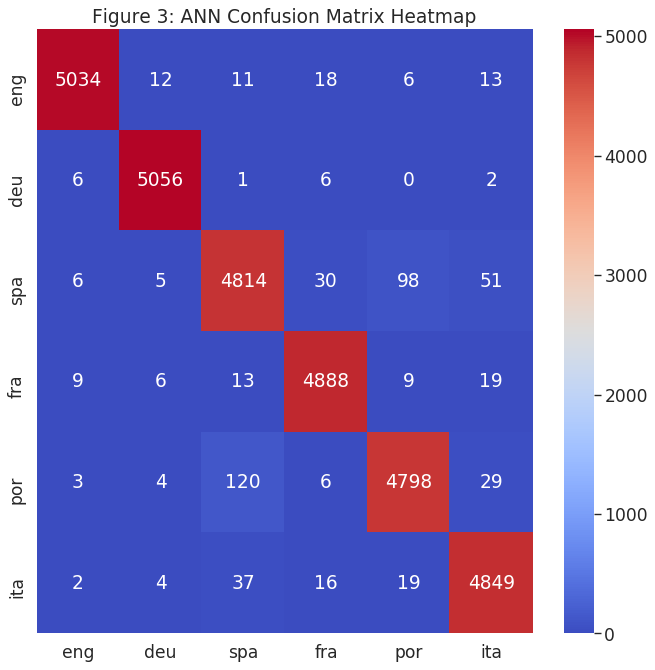

In [11]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
ax = plt.axes()
sns.heatmap(test_data,cmap='coolwarm',ax=ax,annot=True,fmt='.5g')
ax.set_title('Figure 3: ANN Confusion Matrix Heatmap')
plt.show()